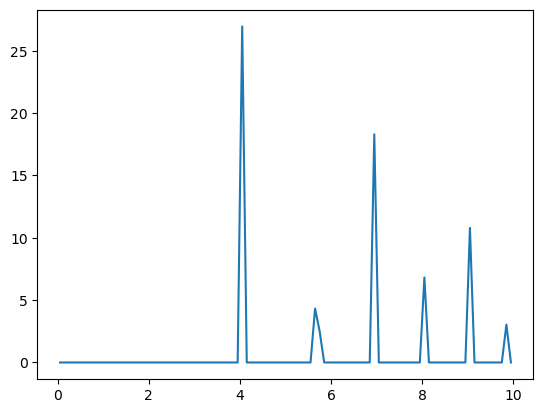

    Step  |     Time [fs] |   Epot/N [eV] | Ekin/N [eV] |  T [K] | Etot/N [eV] | Pressure [MPa]
         0 0.00 -6.996e-02  1.304e-03   10.091 -6.866e-02 -2.720e+02
       100 400.00 -6.897e-02  3.100e-04    2.398 -6.866e-02 -2.461e+02
       200 800.00 -6.931e-02  6.529e-04    5.051 -6.866e-02 -2.549e+02
       300 1200.00 -6.936e-02  6.996e-04    5.412 -6.866e-02 -2.564e+02
       400 1600.00 -6.927e-02  6.123e-04    4.737 -6.866e-02 -2.540e+02
       500 2000.00 -6.935e-02  6.915e-04    5.350 -6.866e-02 -2.559e+02
       600 2400.00 -6.938e-02  7.200e-04    5.570 -6.866e-02 -2.570e+02
       700 2800.00 -6.927e-02  6.082e-04    4.706 -6.866e-02 -2.540e+02
       800 3200.00 -6.932e-02  6.570e-04    5.083 -6.866e-02 -2.552e+02
       900 3600.00 -6.938e-02  7.223e-04    5.588 -6.866e-02 -2.567e+02
      1000 4000.00 -6.926e-02  6.024e-04    4.660 -6.866e-02 -2.540e+02


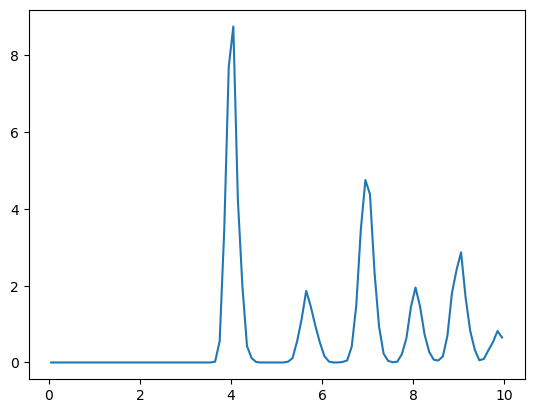

MD finished!


In [5]:
from ase.units import create_units
from ase.md.verlet import VelocityVerlet
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution,Stationary,ZeroRotation
from ase.io import read, write
from ase.build import bulk
from ase.calculators.lj import LennardJones as lj
import numpy as np
from ase.geometry.analysis import get_rdf
import matplotlib.pyplot as plt


units = create_units('2014')


sigma=3.405
epsilon=119.8*units.kB
h_range=10.0
h_bins=100

def print_rdf(a):
    rdf = get_rdf(a,h_range,h_bins)
    plt.plot(rdf[1], rdf[0])
    plt.show()

system=bulk('Ar', 'fcc', a=5.7, cubic=True)*(4,4,4)
system.set_calculator(lj(epsilon=epsilon,sigma=sigma,rc=3*sigma,ro=2.5*sigma,smooth=False))

np.random.seed(2023)
T=10
MaxwellBoltzmannDistribution(system, temperature_K=T,rng=np.random)
Stationary(system)  
ZeroRotation(system) 
dyn = VelocityVerlet(system, timestep=4*units.fs)
print_rdf(system)

n = len(system)
def write_frame():
  dyn.atoms.write(f'traj-{T}K-nve.xyz', write_info=False, columns=['symbols','positions','momenta'],append=True)

def print_energy():
  epot = dyn.atoms.get_potential_energy() / n
  ekin = dyn.atoms.get_kinetic_energy() / n
  cT = ekin / (1.5 * units.kB)
  time = dyn.get_time()/units.fs
  step = dyn.nsteps 
  stress = system.get_stress()
  pressure = -sum(stress[:3])/3.0*1000/units.GPa
  print(f"{step:10d} {time:.2f} {epot:.3e}  {ekin:.3e} {cT:8.3f} {epot+ekin:.3e} {pressure:.3e}")  


print('    Step  |     Time [fs] |   Epot/N [eV] | Ekin/N [eV] |  T [K] | Etot/N [eV] | Pressure [MPa]')

dyn.attach(write_frame, interval=100)
dyn.attach(print_energy,interval=100)

dyn.run(1000)

print_rdf(system)

print("MD finished!")

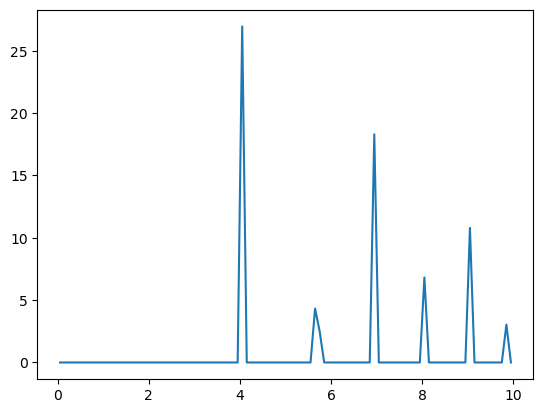

    Step  |     Time [fs] |   Epot/N [eV] | Ekin/N [eV] |  T [K] | Etot/N [eV] | Pressure [MPa]
       100 50.00 -8.161e-02  1.286e-03    9.950 -8.032e-02 5.312e+01
       200 100.00 -8.055e-02  1.268e-03    9.810 -7.928e-02 1.303e+02
       300 150.00 -6.835e-02  1.295e-03   10.020 -6.705e-02 -2.634e+02
       400 200.00 -7.953e-02  1.311e-03   10.145 -7.822e-02 3.985e+01
       500 250.00 -7.909e-02  1.273e-03    9.852 -7.782e-02 9.043e+01
       600 300.00 -6.747e-02  1.267e-03    9.801 -6.621e-02 -2.588e+02
       700 350.00 -7.885e-02  1.306e-03   10.104 -7.755e-02 1.062e+02
       800 400.00 -7.918e-02  1.305e-03   10.095 -7.788e-02 2.250e+01
       900 450.00 -6.762e-02  1.266e-03    9.797 -6.635e-02 -2.592e+02
      1000 500.00 -7.881e-02  1.275e-03    9.867 -7.753e-02 1.833e+02


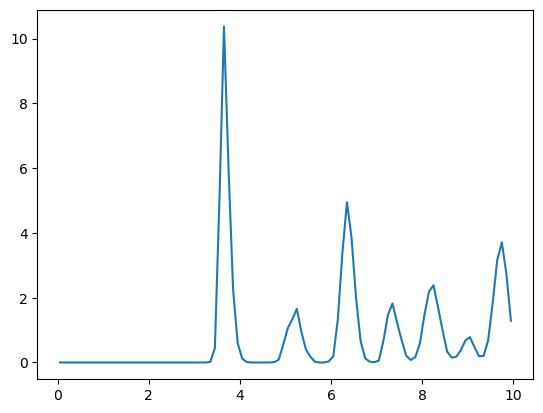

MD finished!


In [1]:
from ase import units
from ase.md.npt import NPT
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution,Stationary,ZeroRotation
from ase.io import read, write
from ase.build import bulk
from ase.calculators.lj import LennardJones as lj
import numpy as np
from ase.geometry.analysis import get_rdf
import matplotlib.pyplot as plt


sigma=3.405
epsilon=119.8*units.kB
h_range=10.0
h_bins=100

def print_rdf(a):
    rdf = get_rdf(a,h_range,h_bins)
    plt.plot(rdf[1], rdf[0])
    plt.show()

system=bulk('Ar', 'fcc', a=5.7, cubic=True)*(4,4,4)
system.set_calculator(lj(epsilon=epsilon,sigma=sigma,rc=3*sigma,ro=2.5*sigma,smooth=False))

print_rdf(system)

np.random.seed(2023)
T=10
MaxwellBoltzmannDistribution(system, temperature_K=T,rng=np.random)
Stationary(system)  
ZeroRotation(system) 
dyn = NPT(system, timestep=0.5*units.fs, temperature_K=T,ttime=0.1,pfactor=0.05,mask=(1,1,1),externalstress=0.0)

n = len(system)
def write_frame():
  dyn.atoms.write(f'traj-{T}K-npt.xyz', write_info=False, columns=['symbols','positions','momenta'],append=True)
  epot = dyn.atoms.get_potential_energy() / n
  ekin = dyn.atoms.get_kinetic_energy() / n
  cT = ekin / (1.5 * units.kB)
  time = dyn.get_time()/units.fs
  step = dyn.nsteps 
  stress = system.get_stress()
  pressure = -sum(stress[:3])/3.0*1000/units.GPa
  print(f"{step:10d} {time:.2f} {epot:.3e}  {ekin:.3e} {cT:8.3f} {epot+ekin:.3e} {pressure:.3e}")
  write(f"traj-{T}K-npt-{step}-res.xyz",system,write_info=False, columns=['symbols','positions','momenta'])

print('    Step  |     Time [fs] |   Epot/N [eV] | Ekin/N [eV] |  T [K] | Etot/N [eV] | Pressure [MPa]')

dyn.attach(write_frame, interval=100)
dyn.run(1000)

print_rdf(system)
print("MD finished!")

In [ ]:
from ase import units
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution,Stationary,ZeroRotation
from ase.io import read, write
from ase.build import bulk
from ase.calculators.lj import LennardJones as lj
import numpy as np
from ase.geometry.analysis import get_rdf
import matplotlib.pyplot as plt


sigma=3.405
epsilon=119.8*units.kB
h_range=10.0
h_bins=100

def print_rdf(a):
    rdf = get_rdf(a,h_range,h_bins)
    plt.plot(rdf[1], rdf[0])
    plt.show()

system=bulk('Ar', 'fcc', a=5.7, cubic=True)*(4,4,4)
system.set_calculator(lj(epsilon=epsilon,sigma=sigma,rc=3*sigma,ro=2.5*sigma,smooth=False))

print_rdf(system)

np.random.seed(2023)
T=10
MaxwellBoltzmannDistribution(system, temperature_K=T,rng=np.random)
Stationary(system)  
ZeroRotation(system) 

dyn = Langevin(system, 4*units.fs, fixcm=True, temperature_K=T, friction=5e-3)

n = len(system)
def write_frame():
  dyn.atoms.write(f'traj-{T}K-nvt.xyz', write_info=False, columns=['symbols','positions','momenta'],append=True)
  epot = dyn.atoms.get_potential_energy() / n
  ekin = dyn.atoms.get_kinetic_energy() / n
  cT = ekin / (1.5 * units.kB)
  time = dyn.get_time()/units.fs
  step = dyn.nsteps 
  stress = system.get_stress()
  pressure = -sum(stress[:3])/3.0*1000/units.GPa
  print(f"{step:10d} {time:.2f} {epot:.3e}  {ekin:.3e} {cT:8.3f} {epot+ekin:.3e} {pressure:.3e}")
  write(f"traj-{T}K-nvt-{step}-res.xyz",system,write_info=False, columns=['symbols','positions','momenta'])

print('    Step  |     Time [fs] |   Epot/N [eV] | Ekin/N [eV] |  T [K] | Etot/N [eV] | Pressure [MPa]')

dyn.attach(write_frame, interval=100)
dyn.run(1000)

print_rdf(system)
print("MD finished!")

In [12]:
from ase.visualize import view
from ase.io import read

a=read("traj-10K-nvt.xyz",index=":")

view(a,viewer="nglview")

In [2]:
from ase import io
from ase.optimize import BFGS
from ase.dyneb import DyNEB
from ase.calculators.mopac import MOPAC


def optimize(a,optf):
  dyn = BFGS(a,trajectory="opt.traj")
  dyn.run(fmax=0.05)
  io.write(optf+".xyz",a,format="xyz")
  a=io.read("opt.traj",index=":")
  io.write(optf+"-traj.xyz",a)

initial = io.read('A.xyz')
initial.set_calculator( MOPAC())
optimize(initial,"init-opt")

final = io.read('B.xyz')
final.set_calculator( MOPAC())
optimize(final,"final-opt")

nimages=13

# Make a band consisting of nimages images:
images = [initial]
images += [initial.copy() for i in range(nimages)]
images += [final]
#neb = NEB(images,climb=True)
neb = DyNEB(images, fmax=0.05, dynamic_relaxation=True)
# Interpolate linearly the potisions of the three middle images:
neb.interpolate()
calcs=[ MOPAC() for i in range(nimages) ]
# Set calculators:
for i in range(nimages):
    images[i+1].calc = calcs[i]
print(images[1].get_forces())

# Optimize:
optimizer = BFGS(neb, trajectory='A2B.traj')
optimizer.run(fmax=0.05)
a=io.read("A2B.traj",index=":")
io.write("neb-opt-traj.xyz",a)

io.write("traj.xyz",images, write_info=False)




          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

      Step     Time          Energy          fmax
BFGS:    0 13:42:38       -2.976327         1.665711


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    1 13:42:38       -3.035126         0.803547


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    2 13:42:38       -3.061263         0.452981


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    3 13:42:38       -3.071571         0.384396


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    4 13:42:38       -3.078695         0.278064


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    5 13:42:38       -3.081856         0.204128


          MOPAC Job: "mopac.mop" ended normally on Apr 27, 2023, at 13:42.

BFGS:    6 13:42:38       -3.083729         0.201068


          MOPAC Job: "mopac.mop

In [7]:
from ase.visualize import view
t=read("traj.xyz",index=':')
view(t,viewer='nglview')